Mean Squared Error: 37490767.74649352
R2 Score: -3.4999563498110406


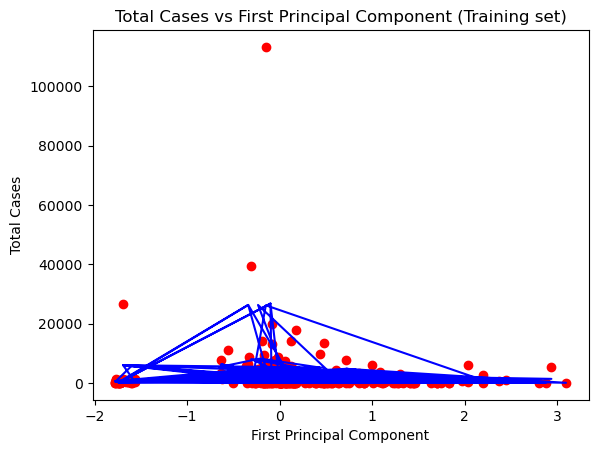

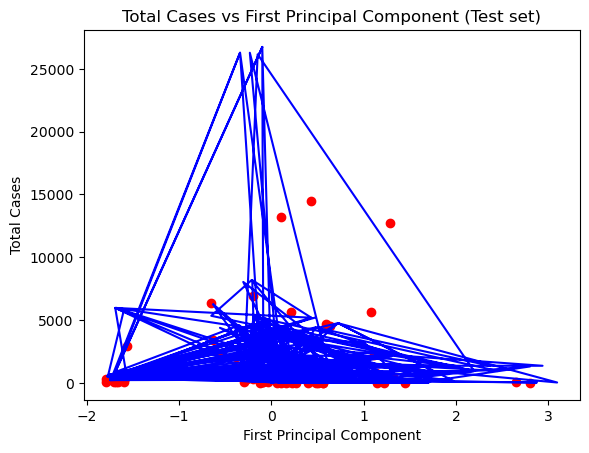

In [4]:
# KNN model for Dengue Prediction

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('dataset/dataset.csv', header = None)
dataset.columns = dataset.iloc[0]
dataset = dataset[1:]
dataset = dataset.drop(columns=['Year'])

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])

# Handling missing data
dataset = dataset.apply(pd.to_numeric, errors='coerce')
# dataset.ffill(inplace=True)
# dataset.fillna(dataset.mean(), inplace=True)
dataset.fillna(dataset.mode().iloc[0], inplace=True)
# dataset.fillna(dataset.median(), inplace=True)
dataset['Total Cases'] = dataset.iloc[:, 37:49].sum(axis=1)
dataset = dataset.drop(dataset.columns[37:49], axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:-1].values
Y = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Predection using KNN
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('R2 Score:', r2_score(Y_test, Y_pred))

# Visualising the Training set results
plt.scatter(X_train[:, 0], Y_train, color = 'red')
plt.plot(X_train[:, 0], regressor.predict(X_train), color = 'blue')
plt.title('Total Cases vs First Principal Component (Training set)')
plt.xlabel('First Principal Component')
plt.ylabel('Total Cases')
plt.show()

# Visualising the Test set results
plt.scatter(X_test[:, 0], Y_test, color = 'red')
plt.plot(X_train[:, 0], regressor.predict(X_train), color = 'blue')
plt.title('Total Cases vs First Principal Component (Test set)')
plt.xlabel('First Principal Component')
plt.ylabel('Total Cases')
plt.show()

